In [1]:
import itertools
import pathlib
import pyam

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# these functions can be found in utils.py in this same directory
from utils import (
    make_quantiles,
    make_sequestration_plot_data,
    sequestration_plot,
    share_of_cdr_data,
)

sns.set_style('whitegrid')

<IPython.core.display.Javascript object>

In [2]:
color_map = {
    '1.5C': 'AR6-C1',
    '2C': 'AR6-C3',
    'Current Policies': 'AR6-IP-CurPol',
}
pyam.run_control().update({'color': {'model': color_map}})

# Load Data

In [3]:
data_path = pathlib.Path('../data')

In [4]:
df = pyam.IamDataFrame(pd.concat([
    pd.read_csv(data_path / 'gidden_et_al_2022_ar6_reanalysis_data.csv'),
    pd.read_csv(data_path / 'additional_analysis_data.csv'),
]))

In [5]:
df.load_meta(data_path / 'gidden_et_al_2022_ar6_reanalysis_meta.csv')

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.core - INFO: Reading meta indicators for 914 out of 1871 scenarios


In [6]:
categories_to_temp = {'C1': '1.5C', 'C3': '2C', 'Current Policies': 'Current Policies'}
df.meta['Temperature'] = df.meta['Category'].replace(categories_to_temp)
df.set_meta(
    'Current Policies', name='Temperature',
    index=df.meta.query("Policy_category_name == 'P1b: Current policies'").index
)

# CDR Bar Chart

In [10]:
variables = {
    'AR6 Reanalysis|OSCARv3.2|Carbon Removal': 'Total CDR', 
    'AR6 Reanalysis|OSCARv3.2|Carbon Removal|Land': 'Land CDR',
    'AR6 Reanalysis|OSCARv3.2|Carbon Removal|Non-Land': 'Non-Land CDR',
}
hist = [2015, 2020]
hist = [2020]
future = [2030, 2050]
future = [2030, 2050, 2100]
data, pdata = make_sequestration_plot_data(
    df.filter(variable=variables.keys(), region='World').rename({'variable': variables}), 
    variables.values(), 
    {'C1': '1.5C', 'C3': '2C'}, years=hist + future
)
for year in hist:
    pdata = pdata.drop(f'{year} 1.5C').rename(index={f'{year} 2C': str(year)})

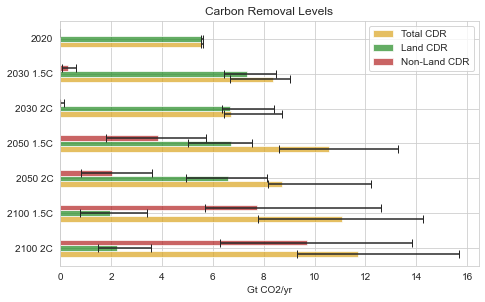

In [11]:
color = {
    'Land CDR': 'forestgreen',
    'Non-Land CDR': 'firebrick',
    'Total CDR': 'goldenrod',
}
size = 3
fig, ax = plt.subplots(figsize=(2.5 * size, 1.5 * size))
sequestration_plot(
    pdata, 
    medians=False, stacked=False, order=variables.values(), color=color,
    legend={'loc': 'best'}, ax=ax,
)
ax.set_title('Carbon Removal Levels')
ax.set_xlabel('Gt CO2/yr') 
ax.set_ylabel('')

fig.savefig('./files/fig4b.pdf', bbox_inches='tight')

# Share of CDR

In [13]:
# fraction of total cdr
total_share = share_of_cdr_data(df, {'C1': '1.5C', 'C3': '2C'}, quantiles=(0.1, 0.25, 0.5, 0.75, 0.9))
total_share.round(decimals=2)

2020  2030  2040  \
model scenario region variable                unit                         
1.5C  0.1      World  Land Share of Total CDR fraction   1.0  0.84  0.50   
      0.25     World  Land Share of Total CDR fraction   1.0  0.92  0.69   
      0.5      World  Land Share of Total CDR fraction   1.0  0.96  0.82   
      0.75     World  Land Share of Total CDR fraction   1.0  0.99  0.93   
      0.9      World  Land Share of Total CDR fraction   1.0  0.99  0.96   
2C    0.1      World  Land Share of Total CDR fraction   1.0  0.94  0.65   
      0.25     World  Land Share of Total CDR fraction   1.0  0.98  0.83   
      0.5      World  Land Share of Total CDR fraction   1.0  0.99  0.93   
      0.75     World  Land Share of Total CDR fraction   1.0  1.00  0.97   
      0.9      World  Land Share of Total CDR fraction   1.0  1.00  0.98   

                                                        2050  2060  2070  \
model scenario region variable                unit                         
1.5C  0.1      World  Land Share of Total CDR fraction  0.25  0.17  0.10   
      0.25     World  Land Share of Total CDR fraction  0.49  0.34  0.25   
      0.5      World  Land Share of Total CDR fraction  0.65  0.53  0.39   
      0.75     World  Land Share of Total CDR fraction  0.79  0.66  0.53   
      0.9      World  Land Share of Total CDR fraction  0.87  0.73  0.65   
2C    0.1      World  Land Share of Total CDR fraction  0.39  0.24  0.18   
      0.25     World  Land Share of Total CDR fraction  0.56  0.36  0.27   
      0.5      World  Land Share of Total CDR fraction  0.77  0.60  0.44   
      0.75     World  Land Share of Total CDR fraction  0.90  0.76  0.59   
      0.9      World  Land Share of Total CDR fraction  0.94  0.83  0.65   

                                                        2080  2090  2100  
model scenario region variable                unit                        
1.5C  0.1      World  Land Share of Total CDR fraction  0.06  0.04 -0.00  
      0.25     World  Land Share of Total CDR fraction  0.19  0.11  0.06  
      0.5      World  Land Share of Total CDR fraction  0.31  0.24  0.19  
      0.75     World  Land Share of Total CDR fraction  0.44  0.38  0.36  
      0.9      World  Land Share of Total CDR fraction  0.64  0.63  0.66  
2C    0.1      World  Land Share of Total CDR fraction  0.10  0.06  0.03  
      0.25     World  Land Share of Total CDR fraction  0.21  0.18  0.14  
      0.5      World  Land Share of Total CDR fraction  0.33  0.26  0.20  
      0.75     World  Land Share of Total CDR fraction  0.45  0.35  0.29  
      0.9      World  Land Share of Total CDR fraction  0.51  0.44  0.40

c:\users\gidden\onedrive - iiasa\work\iiasa\pyam\pyam\plotting.py:1073: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, data in df.iteritems():
c:\users\gidden\onedrive - iiasa\work\iiasa\pyam\pyam\plotting.py:1073: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, data in df.iteritems():


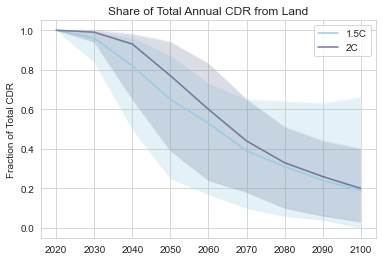

In [14]:
fig, ax = plt.subplots()
data = pyam.IamDataFrame(total_share.round(decimals=2))
(
        data
        .filter(scenario='*0.5*')
        .plot
        .line(color='model', ax=ax, legend=True)
)
(
        data
        .filter(scenario=['*0.25*', '*0.75*'], keep=False)
        .plot
        .line(color='model', fill_between=True, ax=ax, alpha=0.1)
)
ax.set_title('Share of Total Annual CDR from Land')
ax.set_ylabel('Fraction of Total CDR')
ax.set_xlabel('')

fig.savefig('./files/fig4b.pdf', bbox_inches='tight')

# Bar Plots of Removals

## Make Data

In [15]:
# Confirm there are no C1-C3 in current policies
meta = df.meta.copy()
meta.query("Policy_category_name == 'P1b: Current policies'").Category.unique()

array(['C7', 'C6', 'C5'], dtype=object)

In [16]:
variable_rename = {
    'AR6 Reanalysis|OSCARv3.2|Carbon Removal|Land': 'Total',
    'AR6 Reanalysis|OSCARv3.2|Carbon Removal|Land|Direct': 'Direct',
    'AR6 Reanalysis|OSCARv3.2|Carbon Removal|Land|Indirect': 'Indirect',
}
variables = list(variable_rename.values())
data = df.rename(variable=variable_rename).filter(region='World', variable=variables, year=[2020, 2030, 2050])

In [17]:
data = data.offset(year=2020).filter(year=2020, keep=False)

In [18]:
def make_removal_plot_data(df, variables, temps, years=[2030, 2050]):
    # pyam version of quantile data
    data = pyam.concat([
        (
            df
            .filter(region='World', variable=variable)
            .filter(Temperature=temp)
            .compute.quantiles((0.25, 0.5, 0.75))
            .rename(model={'Quantiles': temp})
        ) for temp, variable in itertools.product(temps, variables)
    ])
    
    # data ready for plotting
    pdata = (
        data
        .filter(year=years)
        .as_pandas(meta_cols=False)
        .drop(columns=['region', 'unit'])
        .set_index(['year', 'model', 'scenario', 'variable'])
        ['value']
        .unstack(['scenario', 'variable'])
        / 1e3
    )
    pdata = pdata.reindex(index=pdata.index[::-1]) # reverse ordering so plots are in correct order
    return data, pdata

_data, pdata = make_removal_plot_data(data, variables, list(categories_to_temp.values()), years=[2030, 2050])

## Make Plots

In [19]:
order = ['1.5C', '2C', 'Current Policies']

color_removals = {
    'Direct': '#33701a',
    'Indirect': 'indigo',
    'Total': '#a3176d',
}

In [20]:

def removal_plot(pdata, order=None, hlines=True, stacked=True, cmap='PiYG', ax=None, legend=pyam.plotting.OUTSIDE_LEGEND['bottom']):
    if ax is None:
        fig, ax = plt.subplots(figsize=(7, 5))
    
    base, mins, maxs = pdata['0.5'], pdata['0.25'], pdata['0.75']
    if order:
        base = base.loc[order]
    errors = [[base[c] - mins[c], maxs[c] - base[c]] for c in base.columns]
    
    if hlines:
        for (idx, hline) in base['Total'].items():
            ax.axhline(hline, c=pyam.plotting.PYAM_COLORS[color_map[idx]], label=idx)    
    base.plot.bar(yerr=errors, capsize=4, rot=0, stacked=stacked, ax=ax, color=color_removals, alpha=0.7, legend=False)

    if legend:
        ax.legend(**legend)
    return ax

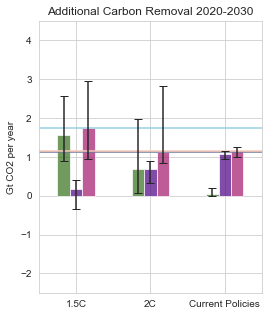

In [21]:
year = 2030

size = 4
fig, ax = plt.subplots(figsize=(1 * size, 1.25 * size))
legend = False
removal_plot(pdata.loc[year], stacked=False, hlines=True, cmap='Accent', ax=ax, order=order, legend=legend)
ax.set_title(f'Additional Carbon Removal 2020-{year}')
ax.set_ylabel('Gt CO2 per year') 
ax.set_xlabel('')
ax.set_ylim(-2.5, 4.5)

fig.savefig('./files/fig4c.pdf', bbox_inches='tight')

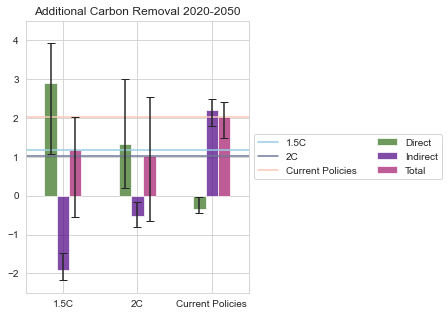

In [22]:
year = 2050

size = 4
fig, ax = plt.subplots(figsize=(1 * size, 1.25 * size))
legend = pyam.plotting.OUTSIDE_LEGEND['right'].copy()
legend.update(ncol= 2)
removal_plot(pdata.loc[year], stacked=False, hlines=True, cmap='Accent', ax=ax, order=order, legend=legend)
ax.set_title(f'Additional Carbon Removal 2020-{year}')
ax.set_xlabel('')
ax.set_ylim(-2.5, 4.5)

fig.savefig('./files/fig4d.pdf', bbox_inches='tight')

# SI Plots

## Removal levels by land

In [24]:
variables = {
    'AR6 Reanalysis|OSCARv3.2|Carbon Removal|Land|Direct': 'Direct Land CDR',
    'AR6 Reanalysis|OSCARv3.2|Carbon Removal|Land|Indirect': 'Indirect Land CDR',
}
hist = [2015, 2020]
hist = [2020]
future = [2030, 2050]
future = [2030, 2050, 2100]
data, pdata = make_sequestration_plot_data(
    df.filter(variable=variables.keys(), region='World').rename({'variable': variables}), 
    variables.values(), 
    {'C1': '1.5C', 'C3': '2C'}, years=hist + future
)
for year in hist:
    pdata = pdata.drop(f'{year} 1.5C').rename(index={f'{year} 2C': str(year)})

Text(0, 0.5, '')

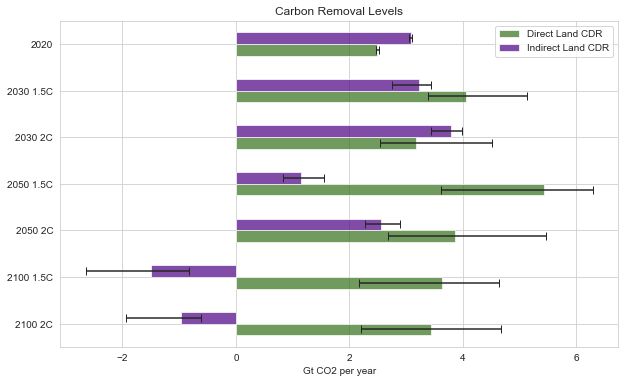

In [25]:
size = 4
fig, ax = plt.subplots(figsize=(2.5 * size, 1.5 * size))
sequestration_plot(
    pdata, 
    medians=False, stacked=False, order=variables.values(), 
    color={'Direct Land CDR': '#33701a', 'Indirect Land CDR': 'indigo'},
    legend={'loc': 'best'}, ax=ax,
)
ax.set_title('Carbon Removal Levels')
ax.set_xlabel('Gt CO2 per year') 
ax.set_ylabel('')
#ax.set_xlim(0, 18)
#ax.legend(**pyam.plotting.OUTSIDE_LEGEND['bottom'])

In [26]:
pdata/ pdata.loc['2020']

scenario             0.25                               0.5                    \
variable  Direct Land CDR Indirect Land CDR Direct Land CDR Indirect Land CDR   
index                                                                           
2100 2C          0.889908         -0.637839        1.386553         -0.314799   
2100 1.5C        0.879604         -0.871055        1.465213         -0.483882   
2050 2C          1.083839          0.745804        1.554694          0.829782   
2050 1.5C        1.466897          0.273017        2.188953          0.372934   
2030 2C          1.026133          1.128086        1.275939          1.229089   
2030 1.5C        1.367713          0.904038        1.629532          1.049510   
2020             1.000000          1.000000        1.000000          1.000000   

scenario             0.75                    
variable  Direct Land CDR Indirect Land CDR  
index                                        
2100 2C          1.847507         -0.200401  
2100 1.5C        1.833274         -0.268217  
2050 2C          2.164417          0.930474  
2050 1.5C        2.490735          0.502465  
2030 2C          1.789481          1.281603  
2030 1.5C        2.032962          1.107823  
2020             1.000000          1.000000

## Cumulative CDR

In [28]:
variables = ['Cumulative Carbon Sink - Indirect', 'Cumulative Carbon Sink - Direct']
data, pdata = make_sequestration_plot_data(df.filter(region='World'), variables, {'C1': '1.5C', 'C3': '2C'}, years=future)

Text(0, 0.5, '')

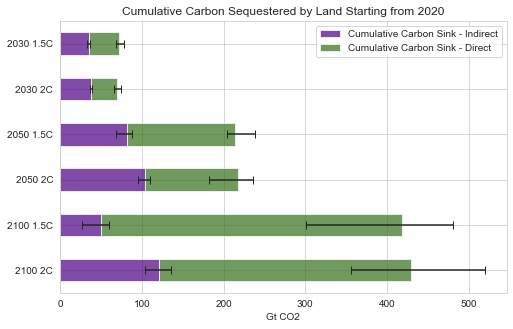

In [42]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = sequestration_plot(
    pdata, order=variables, medians=False,
    color={'Cumulative Carbon Sink - Direct': '#33701a', 'Cumulative Carbon Sink - Indirect': 'indigo'},
    legend={'loc': 'best'}, ax=ax
)
ax.set_title('Cumulative Carbon Sequestered by Land Starting from 2020')
ax.set_xlabel('Gt CO2')
ax.set_ylabel('')

In [37]:
pdata['0.5']

variable,Cumulative Carbon Sink - Direct,Cumulative Carbon Sink - Indirect
index,,
2100 2C,308.000642,121.384628
2100 1.5C,368.369799,50.441567
2050 2C,113.314394,103.862275
2050 1.5C,132.976731,81.201525
2030 2C,31.195124,38.079931
2030 1.5C,35.941523,35.414730


In [40]:
133 / 113 # ~20% more

1.176991150442478

In [41]:
81 / 103 # ~20% less

0.7864077669902912